<a href="https://colab.research.google.com/github/Priyanshu-4096/21BDS0083_EDA/blob/main/21BDS0083_eda_mod3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Priyanshu-4096/21BDS0083_EDA

#Name - Priyanshu Joarder
#Reg no - 21BDS0083
#Course Title - Exploratory Data Analysis
#Course Code - BCSE331L

Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
df = pd.read_csv('SuicideChina.csv')

# Data deduplication
print("Duplicate rows before deduplication:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate rows after deduplication:", df.duplicated().sum())

# Replacing values
df['Hospitalised'] = df['Hospitalised'].replace('yes', 1).replace('no', 0)
df['Died'] = df['Died'].replace('yes', 1).replace('no', 0)
df['Urban'] = df['Urban'].replace('yes', 1).replace('no', 0)

# Discretization and binning
df['Age_group'] = pd.cut(df['Age'], bins=[-1, 20, 40, 60, 80, 100], labels=['0-19', '20-39', '40-59', '60-79', '80+'])

# Handling missing data
print("\nMissing values per column:")
print(df.isnull().sum())

# Traditional method - Mean imputation
imputer = SimpleImputer(strategy='mean')
df[['Age']] = imputer.fit_transform(df[['Age']])

# Maximum Likelihood Estimation (MLE) imputation (for comparison)
imputer_mle = IterativeImputer(max_iter=10, random_state=42)
df[['Age']] = imputer_mle.fit_transform(df[['Age']])

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save the transformed dataset
df.to_csv('SuicideChina_transformed.csv', index=False)

Duplicate rows before deduplication: 0
Duplicate rows after deduplication: 0

Missing values per column:
rownames        0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
Age_group       0
dtype: int64

Missing values after imputation:
rownames        0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
Age_group       0
dtype: int64


<ipython-input-11-8388480c3057>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Hospitalised'] = df['Hospitalised'].replace('yes', 1).replace('no', 0)
<ipython-input-11-8388480c3057>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Died'] = df['Died'].replace('yes', 1).replace('no', 0)


Module 3:Correlation Analysis and Time SeriesAnalysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('SuicideChina_transformed.csv')

# Set the style for better visualizations
plt.style.use('default')  # Using default style instead of seaborn
sns.set_theme()  # This sets the seaborn theme without using plt.style

1. UNIVARIATE ANALYSIS


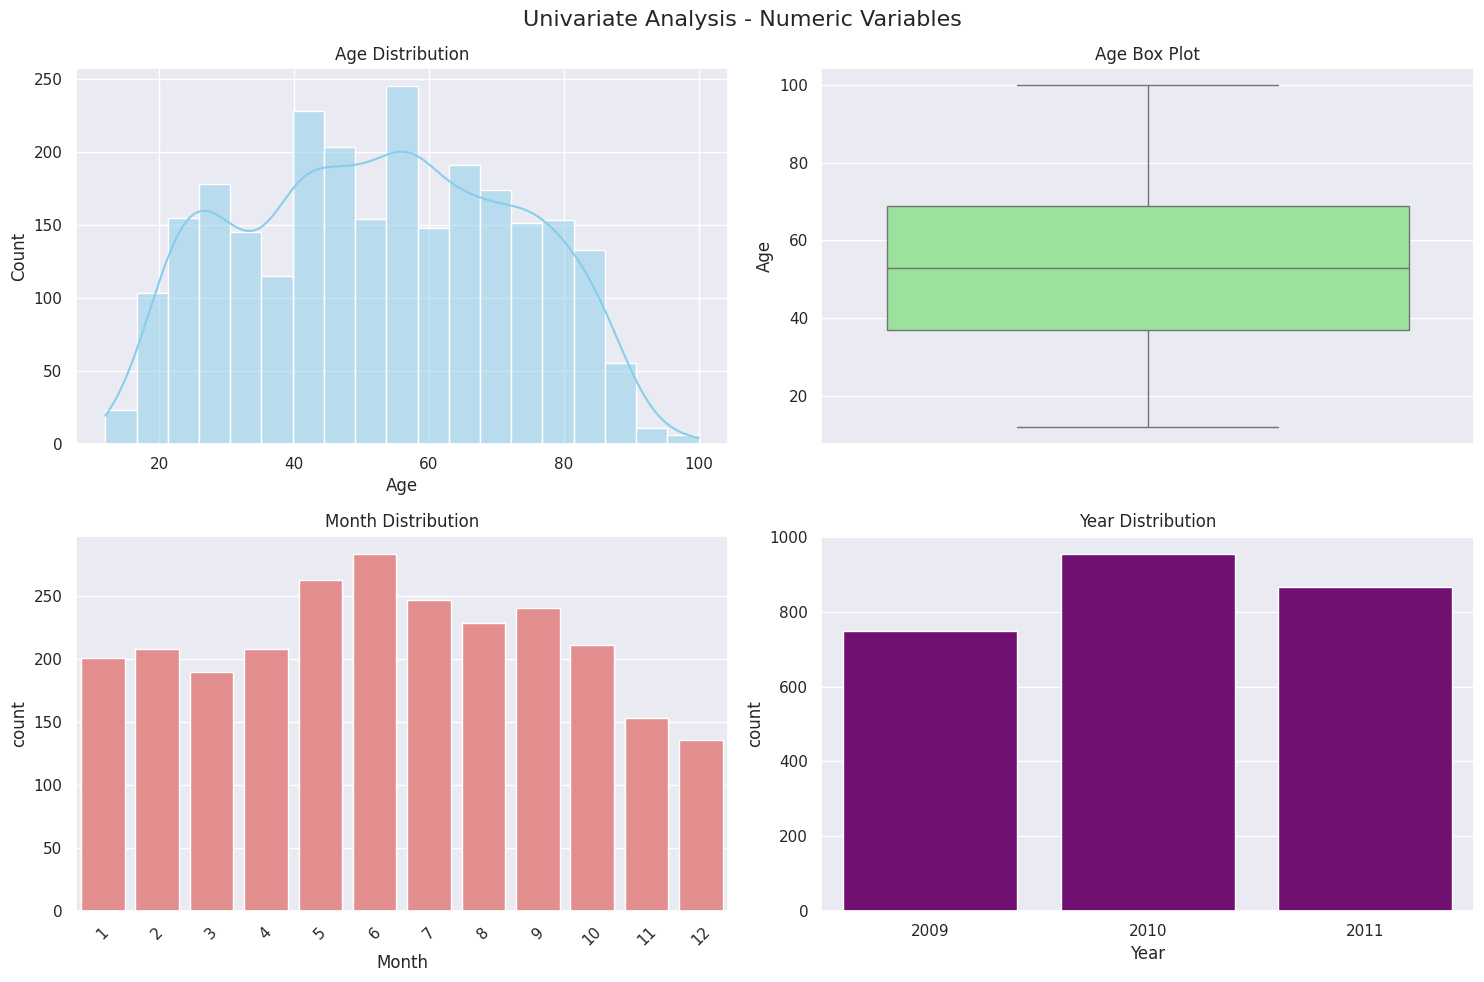

<ipython-input-13-26eb90ca0701>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', ax=axes[0,0], palette='Set2')
<ipython-input-13-26eb90ca0701>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Education', ax=axes[0,1], palette='Set3')
<ipython-input-13-26eb90ca0701>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='method', ax=axes[1,0], palette='Set1')
<ipython-input-13-26eb90ca0701>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

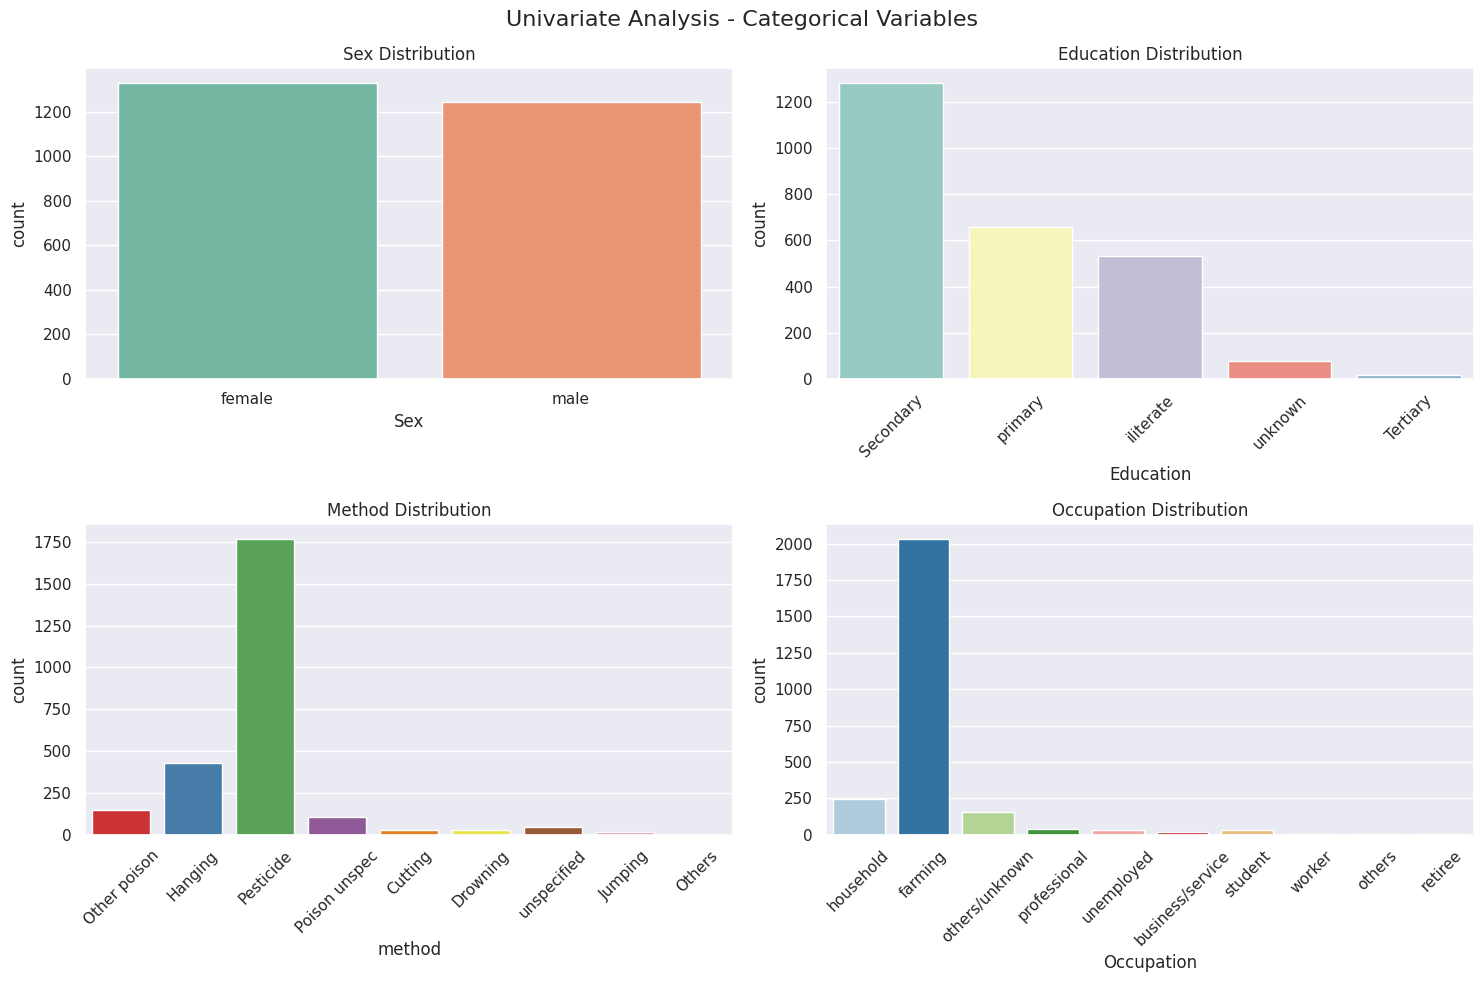

In [ ]:
# 1. UNIVARIATE ANALYSIS
print("1. UNIVARIATE ANALYSIS")

# Numeric Variables Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Univariate Analysis - Numeric Variables', fontsize=16)

# Age distribution
sns.histplot(data=df, x='Age', kde=True, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Age Distribution')

# Box plot for Age
sns.boxplot(data=df, y='Age', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Age Box Plot')

# Month distribution
sns.countplot(data=df, x='Month', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('Month Distribution')
axes[1,0].tick_params(axis='x', rotation=45)

# Year distribution
sns.countplot(data=df, x='Year', ax=axes[1,1], color='purple')
axes[1,1].set_title('Year Distribution')
plt.tight_layout()
plt.show()

# Categorical Variables Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Univariate Analysis - Categorical Variables', fontsize=16)

# Sex distribution
sns.countplot(data=df, x='Sex', ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Sex Distribution')

# Education distribution
sns.countplot(data=df, x='Education', ax=axes[0,1], palette='Set3')
axes[0,1].set_title('Education Distribution')
axes[0,1].tick_params(axis='x', rotation=45)

# Method distribution
sns.countplot(data=df, x='method', ax=axes[1,0], palette='Set1')
axes[1,0].set_title('Method Distribution')
axes[1,0].tick_params(axis='x', rotation=45)

# Occupation distribution
sns.countplot(data=df, x='Occupation', ax=axes[1,1], palette='Paired')
axes[1,1].set_title('Occupation Distribution')
axes[1,1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()




2. BIVARIATE ANALYSIS


<ipython-input-14-67bc8846b021>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Sex', y='Age', ax=axes[0,0], palette='Set2')
<ipython-input-14-67bc8846b021>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Education', y='Age', ax=axes[0,1], palette='Set3')


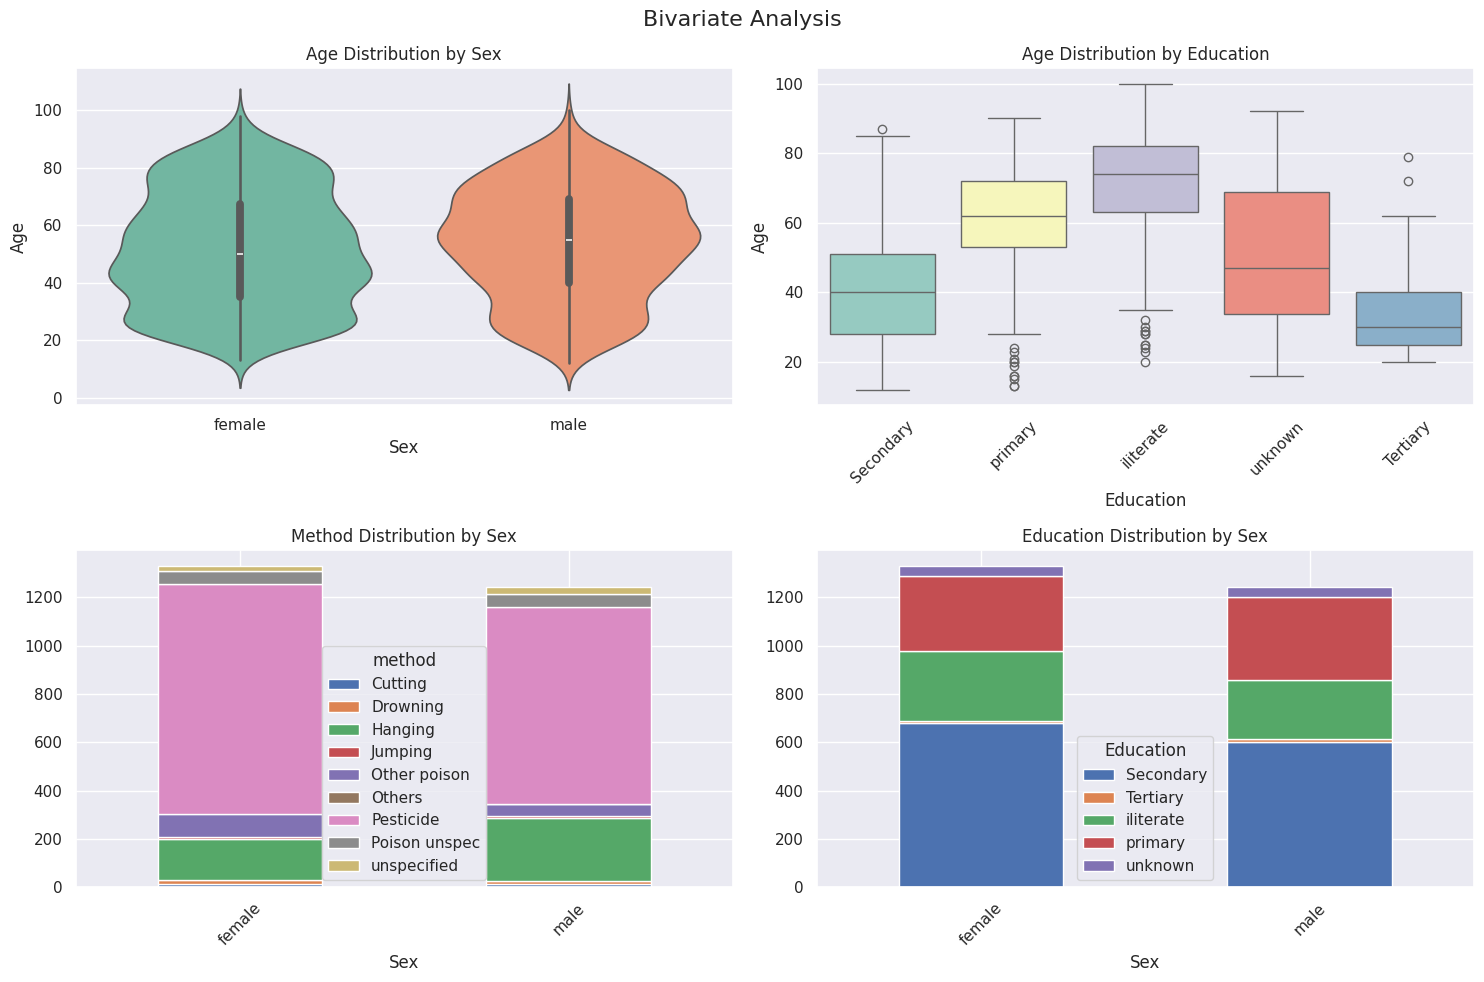

In [ ]:

# 2. BIVARIATE ANALYSIS
print("\n2. BIVARIATE ANALYSIS")

# Create a figure for bivariate analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Bivariate Analysis', fontsize=16)

# Age vs Sex
sns.violinplot(data=df, x='Sex', y='Age', ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Age Distribution by Sex')

# Age vs Education
sns.boxplot(data=df, x='Education', y='Age', ax=axes[0,1], palette='Set3')
axes[0,1].set_title('Age Distribution by Education')
axes[0,1].tick_params(axis='x', rotation=45)

# Method distribution by Sex
pd.crosstab(df['Sex'], df['method']).plot(kind='bar', ax=axes[1,0], stacked=True)
axes[1,0].set_title('Method Distribution by Sex')
axes[1,0].tick_params(axis='x', rotation=45)

# Education distribution by Sex
pd.crosstab(df['Sex'], df['Education']).plot(kind='bar', ax=axes[1,1], stacked=True)
axes[1,1].set_title('Education Distribution by Sex')
axes[1,1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


3. MULTIVARIATE ANALYSIS


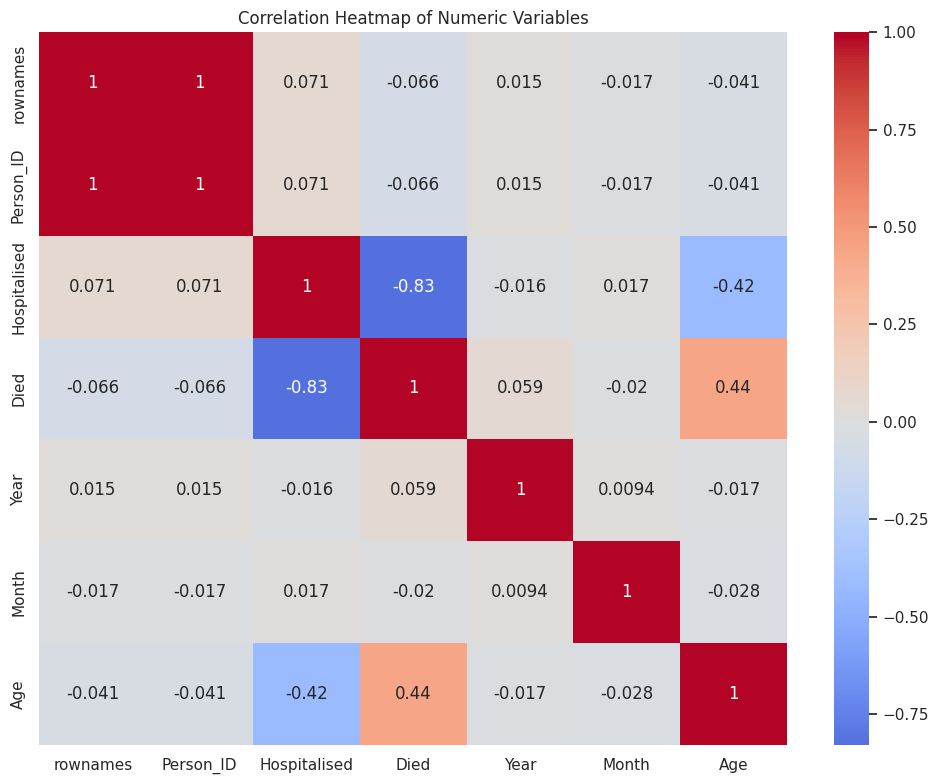

<ipython-input-16-fc3fb7b0605d>:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, x='Age', hue='method', label=sex)


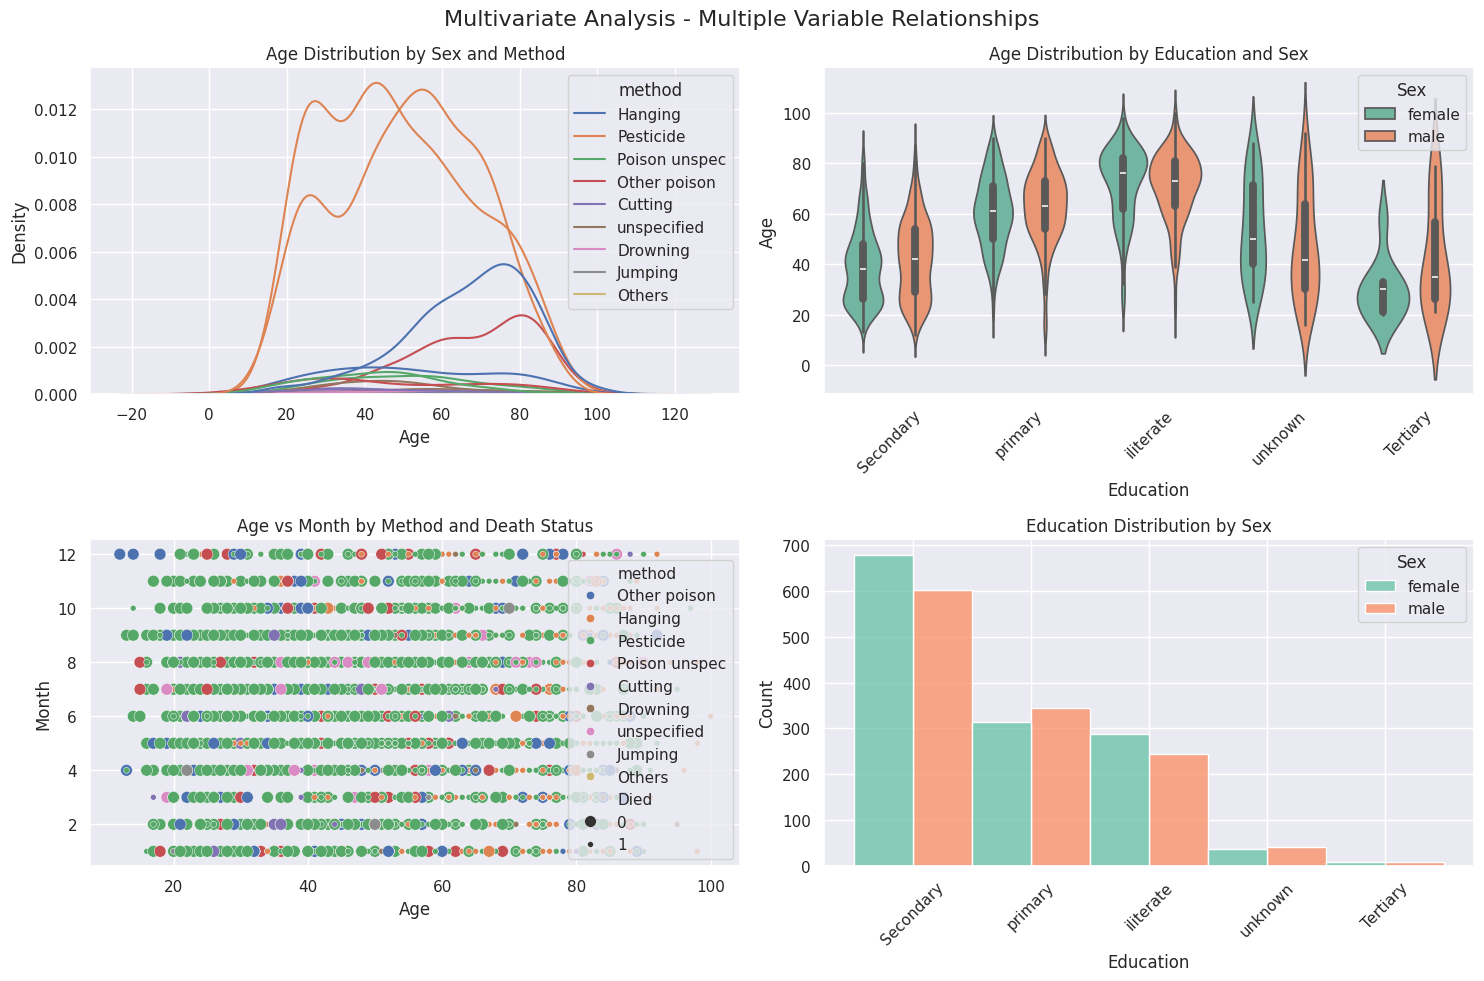


Key Statistical Insights:

1. Summary Statistics for Age:
count    2571.000000
mean       52.630883
std        19.783878
min        12.000000
25%        37.000000
50%        53.000000
75%        69.000000
max       100.000000
Name: Age, dtype: float64

2. Cross-tabulation of Sex and Method:
method  Cutting  Drowning  Hanging  Jumping  Other poison  Others  Pesticide  \
Sex                                                                            
female       14        16      170        8            96       0        952   
male         15        10      261        7            50       1        816   

method  Poison unspec  unspecified  
Sex                                 
female             54           18  
male               53           30  

3. Average Age by Sex and Education:
Education  Secondary   Tertiary  iliterate    primary    unknown
Sex                                                             
female     38.960177  30.111111  71.695502  60.449045  53.815789
male 

In [ ]:

# 3. MULTIVARIATE ANALYSIS
print("\n3. MULTIVARIATE ANALYSIS")

# Create correlation matrix for numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

# Multiple Variable Relationships
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Multivariate Analysis - Multiple Variable Relationships', fontsize=16)

# Age, Sex, and Method
plt.subplot(221)
for sex in df['Sex'].unique():
    subset = df[df['Sex'] == sex]
    sns.kdeplot(data=subset, x='Age', hue='method', label=sex)
plt.title('Age Distribution by Sex and Method')

# Education, Sex, and Age
plt.subplot(222)
sns.violinplot(data=df, x='Education', y='Age', hue='Sex', palette='Set2')
plt.title('Age Distribution by Education and Sex')
plt.xticks(rotation=45)

# Method, Age, and Died
plt.subplot(223)
sns.scatterplot(data=df, x='Age', y='Month', hue='method', size='Died', palette='deep')
plt.title('Age vs Month by Method and Death Status')

# Education, Method, and Sex
plt.subplot(224)
sns.histplot(data=df, x='Education', hue='Sex', multiple="dodge", palette='Set2')
plt.title('Education Distribution by Sex')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print additional statistical insights
print("\nKey Statistical Insights:")
print("\n1. Summary Statistics for Age:")
print(df['Age'].describe())

print("\n2. Cross-tabulation of Sex and Method:")
print(pd.crosstab(df['Sex'], df['method']))

print("\n3. Average Age by Sex and Education:")
print(df.groupby(['Sex', 'Education'])['Age'].mean().unstack())

print("\n4. Chi-square test for independence between Sex and Method:")
chi2, p_value = stats.chi2_contingency(pd.crosstab(df['Sex'], df['method']))[:2]
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")